## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [33]:
import math
import io

In [34]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [35]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [36]:
poll = pd.read_csv('poll.csv')

In [37]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [38]:
poll.head()


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [39]:
poll.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

In [40]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [41]:
s = sample(0.51,n=1000)

In [42]:
s.vote.value_counts(normalize=True)

vote
Green    0.502
Brown    0.498
Name: proportion, dtype: float64

In [43]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [44]:
dist.head()

vote,Green,Brown
proportion,0.508,0.492
proportion,0.485,0.515
proportion,0.484,0.516
proportion,0.475,0.525
proportion,0.481,0.519


<Axes: >

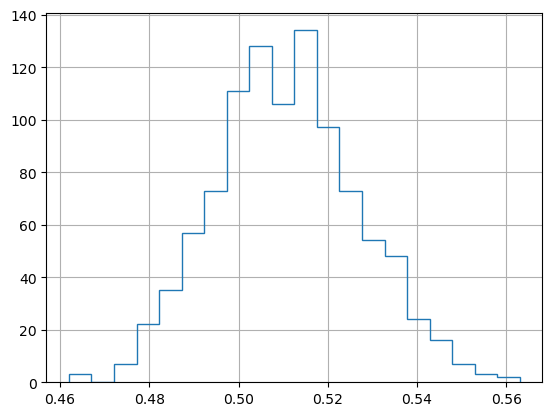

In [45]:
dist.Brown.hist(histtype='step',bins=20)

In [46]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [47]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [48]:
quantiles(0.50)

(0.467, 0.532025)

In [49]:
quantiles(0.48)

(0.448975, 0.51)

In [50]:
quantiles(0.54)

(0.509975, 0.5720249999999999)

In [51]:
dist = samplingdist(0.50,10000)

<Axes: >

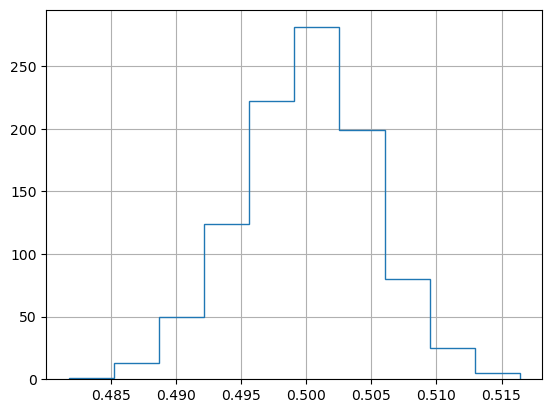

In [52]:
dist.Brown.hist(histtype='step')

In [53]:
largepoll = pd.read_csv('poll-larger.csv')

In [54]:
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64